# Decision Tree regression

- https://scikit-learn.org/stable/modules/tree.html#tree
- https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


california = fetch_california_housing()

In [2]:
# Prepare dataset.
explanatory_feature_names = california.feature_names

df = pd.DataFrame(
    california.data,
    columns=explanatory_feature_names
)
df['Price'] = california.target

display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Split the data into Explanatory and Objective variables.
X = df[explanatory_feature_names]
y = df[['Price']]

display(X.head())
display(y.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [4]:
# Split dataset into training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

print(f'X_train length: {len(X_train)}')
display(X_train.head())
print(f'\nX_test length: {len(X_test)}')
display(X_test.head())

X_train length: 14448


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81



X_test length: 6192


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43


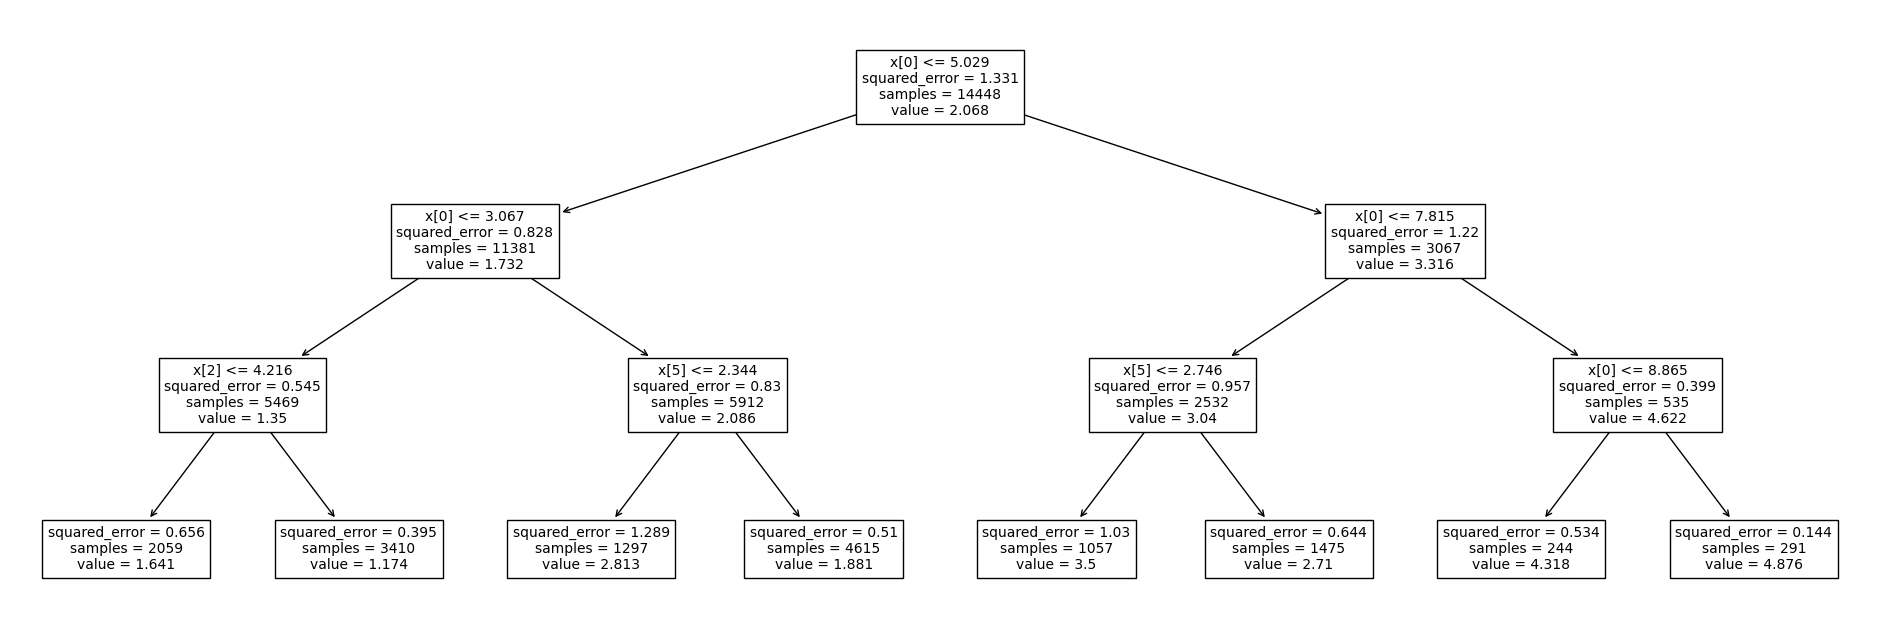

In [5]:
# Construct decision tree regression model.
def decision_tree_regression(depth: int, min_leaf: int = 1):
    """Construct decision tree using any depth.
    """
    return DecisionTreeRegressor(
        max_depth=depth,
        min_samples_leaf=min_leaf,
        random_state=0
    ).fit(X_train, y_train)


def plot_decision_tree(tree_reg) -> None:
    """Plot decision tree.
    """
    plt.figure(figsize=(24, 8))
    plot_tree(
        tree_reg,
        fontsize=10
    )


tree_regression = decision_tree_regression(3)

plot_decision_tree(tree_regression)

In [6]:
# Show predicted values.
def predict_and_expand_dimension(tree_reg, x):
    x_pred = tree_reg.predict(x)
    return np.expand_dims(x_pred, 1)


y_train_predict = predict_and_expand_dimension(tree_regression, X_train)
y_test_predict = predict_and_expand_dimension(tree_regression, X_test)

print(f'y_train_predict: {len(y_train_predict)}\n{y_train_predict}\n')
print(f'y_test_predict: {len(y_test_predict)}\n{y_test_predict}')

y_train_predict: 14448
[[1.64116085]
 [1.64116085]
 [2.71033782]
 ...
 [2.81297764]
 [3.5002475 ]
 [1.64116085]]

y_test_predict: 6192
[[1.88137512]
 [2.71033782]
 [1.88137512]
 ...
 [4.31789332]
 [1.1735396 ]
 [1.88137512]]


In [7]:
def plot_meta_informations(x_label: str, y_label: str, title: str) -> None:
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

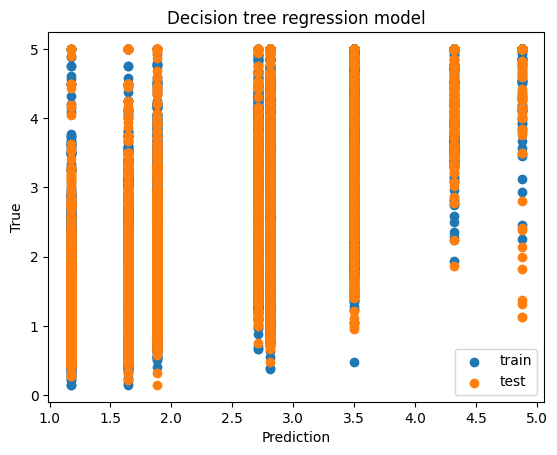

In [8]:
# Plot predictions for evaluate the model.
plt.scatter(
    y_train_predict,
    y_train,
    label='train'
)
plt.scatter(
    y_test_predict,
    y_test,
    label='test'
)

plot_meta_informations('Prediction', 'True', 'Decision tree regression model')

In [9]:
def residual_plot(train_pred_y, train_y, test_pred_y, test_y) -> None:
    """Visualize difference between actual and predicted values using Residual plot.
    """
    plt.scatter(
        train_pred_y,
        train_pred_y - train_y,
        label='train'
    )
    plt.scatter(
        test_pred_y,
        test_pred_y - test_y,
        label='test'
    )
    plt.plot(
        [0, 12],
        [0, 0],
        color='red'
    )

    plot_meta_informations('Prediction', '(Prediction - True)', 'Residual plot') 

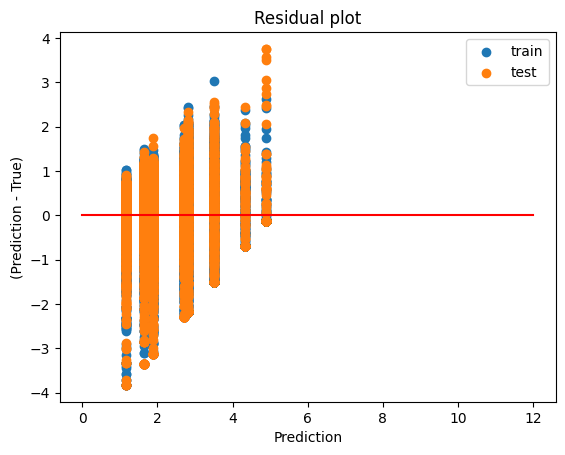

In [10]:
# Evaluate the model using Residual plot.
residual_plot(
    y_train_predict,
    y_train,
    y_test_predict,
    y_test
)

In [11]:
def _metrics_result_text(metrics: str, result: float) -> str:
    return f'{metrics} = {round(result, 4)}'


def accuracy_metrics_evaluation(y, y_pred, headline: str) -> None:
    mae: float = mean_absolute_error(y, y_pred)
    mse: float = mean_squared_error(y, y_pred)
    rmse: float = np.sqrt(mse)
    r2score: float = r2_score(y, y_pred)

    print(
        f'{headline}:\n' \
        f"{_metrics_result_text('MAE', mae)}\n" \
        f"{_metrics_result_text('MSE', mse)}\n" \
        f"{_metrics_result_text('RMSE', rmse)}\n" \
        f"{_metrics_result_text('R2', r2score)}"
    )

In [12]:
# Confirm accuracy assessment.
accuracy_metrics_evaluation(
    y_test,
    y_test_predict,
    'Test data Scores'
)

# Check for Overlearning tendencies.
accuracy_metrics_evaluation(
    y_train,
    y_train_predict,
    'Train data Scores'
)

Test data Scores:
MAE = 0.6081
MSE = 0.6659
RMSE = 0.816
R2 = 0.5006
Train data Scores:
MAE = 0.587
MSE = 0.6185
RMSE = 0.7865
R2 = 0.5352


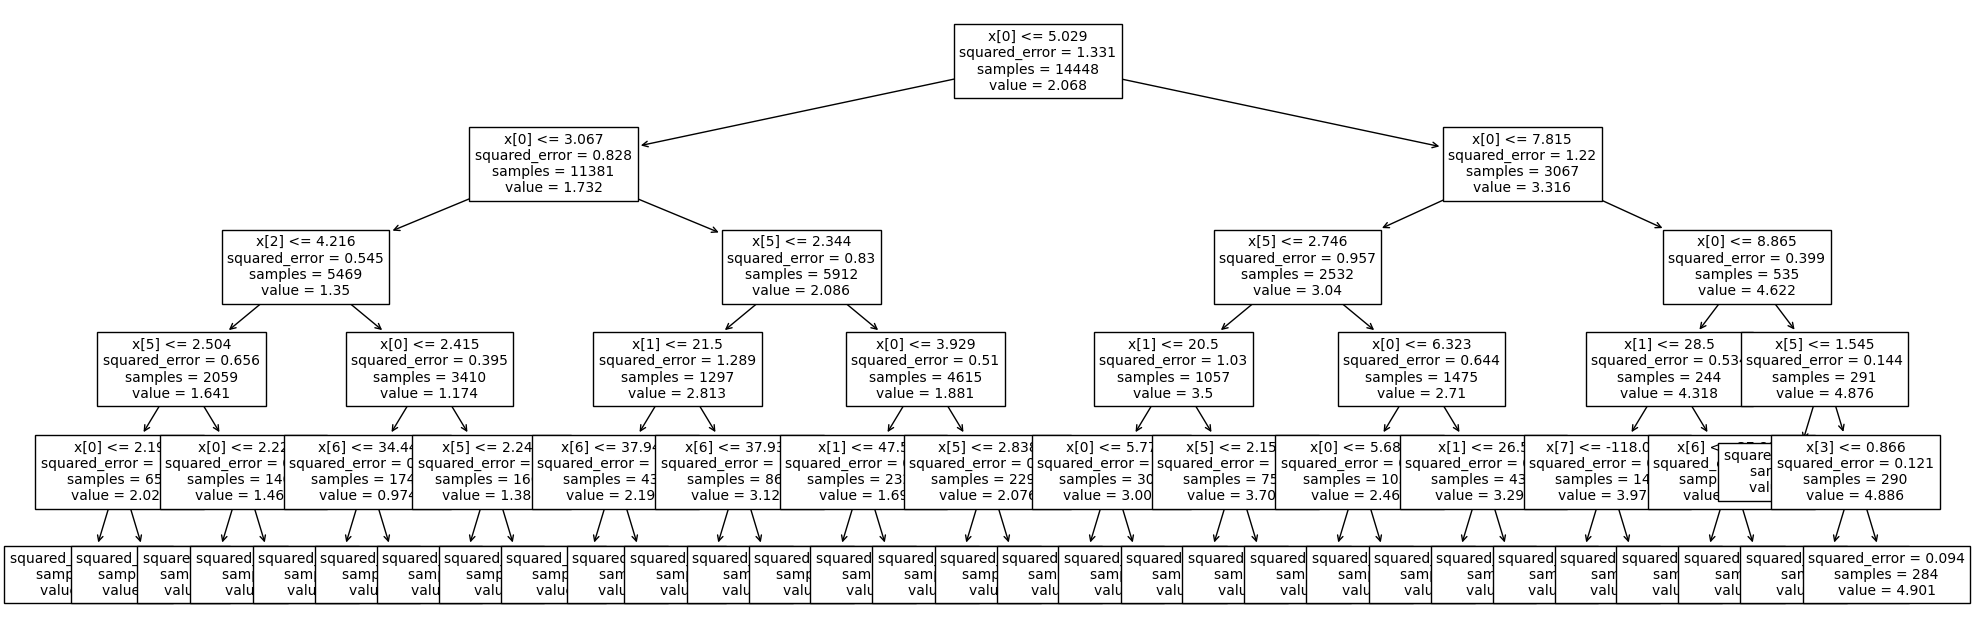

In [13]:
# Reconstruct decision tree regression model at different depths.
tree_regression_5_depth = decision_tree_regression(5)

plot_decision_tree(tree_regression_5_depth)

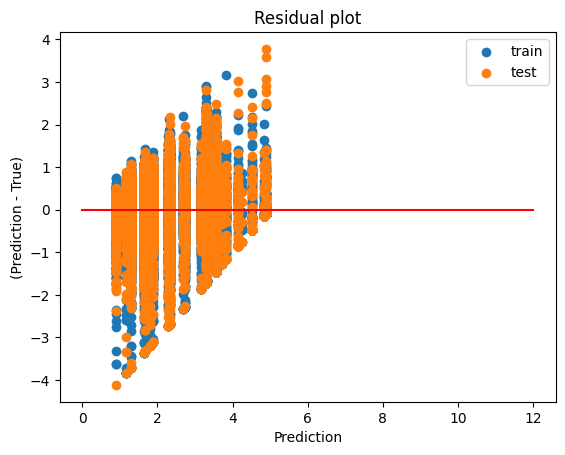

In [14]:
# Re-evaluate the model with defferent depths.
y_train_predict_5_depth = predict_and_expand_dimension(tree_regression_5_depth, X_train)
y_test_predict_5_depth = predict_and_expand_dimension(tree_regression_5_depth, X_test)

residual_plot(
    y_train_predict_5_depth,
    y_train,
    y_test_predict_5_depth,
    y_test
)

In [15]:
# Confirm accuracy assessment.
accuracy_metrics_evaluation(
    y_test,
    y_test_predict_5_depth,
    'Test data Scores'
)

# Check for Overlearning tendencies.
accuracy_metrics_evaluation(
    y_train,
    y_train_predict_5_depth,
    'Train data Scores'
)

Test data Scores:
MAE = 0.5319
MSE = 0.5375
RMSE = 0.7331
R2 = 0.5969
Train data Scores:
MAE = 0.5113
MSE = 0.491
RMSE = 0.7007
R2 = 0.6311


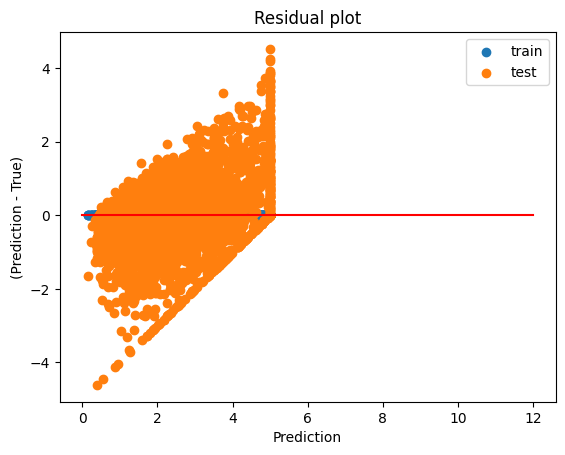

In [16]:
tree_regression_deep_depth = decision_tree_regression(20)

y_train_predict_deep_depth = predict_and_expand_dimension(tree_regression_deep_depth, X_train)
y_test_predict_deep_depth = predict_and_expand_dimension(tree_regression_deep_depth, X_test)

residual_plot(
    y_train_predict_deep_depth,
    y_train,
    y_test_predict_deep_depth,
    y_test
)

In [17]:
# Confirm accuracy assessment.
accuracy_metrics_evaluation(
    y_test,
    y_test_predict_deep_depth,
    'Test data Scores'
)

# Check for Overlearning tendencies.
accuracy_metrics_evaluation(
    y_train,
    y_train_predict_deep_depth,
    'Train data Scores'
)

Test data Scores:
MAE = 0.4637
MSE = 0.5386
RMSE = 0.7339
R2 = 0.596
Train data Scores:
MAE = 0.0194
MSE = 0.0045
RMSE = 0.0671
R2 = 0.9966


If the depth is too deep, there is a tendency toward overlearning.

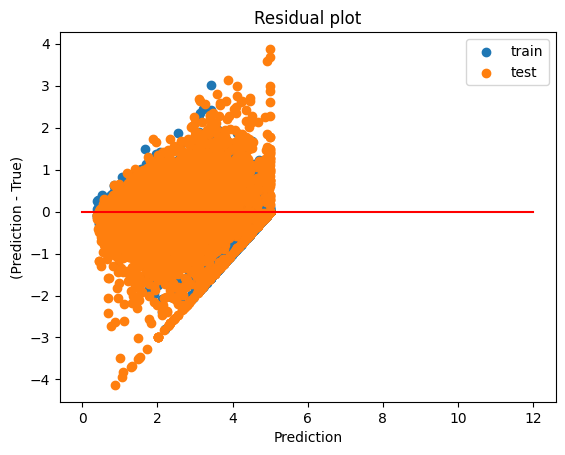

In [18]:
# Re-execute with a different minimum number of samples.
tree_regression_sample_leaf_specified = decision_tree_regression(20, 5)

y_train_predict_sample_leaf_specified = predict_and_expand_dimension(
    tree_regression_sample_leaf_specified,
    X_train
)
y_test_predict_sample_leaf_specified = predict_and_expand_dimension(
    tree_regression_sample_leaf_specified,
    X_test
)

residual_plot(
    y_train_predict_sample_leaf_specified,
    y_train,
    y_test_predict_sample_leaf_specified,
    y_test
)

In [19]:
"""Random Forest Regression analysis.
"""
from sklearn.ensemble import RandomForestRegressor


def random_forest_regression(x, y, estimators: int = 10):
    """Construct decision tree using any depth.
    """
    y_train_ravel = y.values.ravel()
    
    return RandomForestRegressor(
        n_estimators=estimators,
        max_depth=20,
        random_state=0
    ).fit(x, y_train_ravel)


def expand_dimensions(y, dimensions: int = 1):
    return np.expand_dims(y, dimensions)


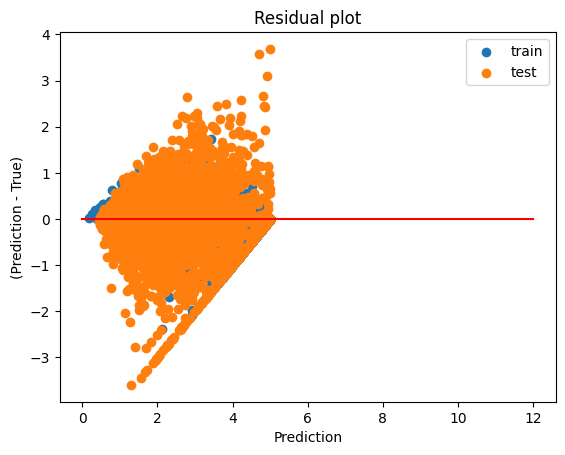

In [20]:
# Construct Random Forest regression model.
rf = random_forest_regression(
    X_train,
    y_train
)

y_train_pred_rf_init = expand_dimensions(
    rf.predict(X_train)
)
y_test_pred_rf_init = expand_dimensions(
    rf.predict(X_test)
)

residual_plot(
    y_train_pred_rf_init,
    y_train,
    y_test_pred_rf_init,
    y_test
)

In [21]:
# Confirm accuracy assessment.
accuracy_metrics_evaluation(
    y_test,
    y_test_pred_rf_init,
    'Test data Scores'
)

# Check for Overlearning tendencies.
accuracy_metrics_evaluation(
    y_train,
    y_train_pred_rf_init,
    'Train data Scores'
)

Test data Scores:
MAE = 0.359
MSE = 0.3042
RMSE = 0.5516
R2 = 0.7718
Train data Scores:
MAE = 0.1495
MSE = 0.0556
RMSE = 0.2358
R2 = 0.9582


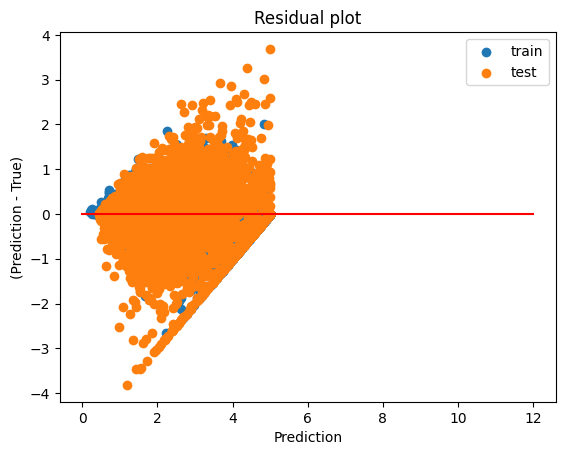

In [22]:
# Re-construct the model using fewer decision trees.
rf_fewer_trees = random_forest_regression(
    X_train,
    y_train,
    5
)

y_train_pred_rf_fewer_trees = expand_dimensions(
    rf_fewer_trees.predict(X_train)
)
y_test_pred_rf_fewer_trees = expand_dimensions(
    rf_fewer_trees.predict(X_test)
)

residual_plot(
    y_train_pred_rf_fewer_trees,
    y_train,
    y_test_pred_rf_fewer_trees,
    y_test
)

In [23]:
# Confirm accuracy assessment.
accuracy_metrics_evaluation(
    y_test,
    y_test_pred_rf_fewer_trees,
    'Test data Scores'
)

# Check for Overlearning tendencies.
accuracy_metrics_evaluation(
    y_train,
    y_train_pred_rf_fewer_trees,
    'Train data Scores'
)

Test data Scores:
MAE = 0.3834
MSE = 0.3383
RMSE = 0.5817
R2 = 0.7462
Train data Scores:
MAE = 0.1651
MSE = 0.0757
RMSE = 0.2751
R2 = 0.9431
